In [616]:
import recommendation_system.recommend_system_package.contented_base
import recommendation_system.recommend_system_package.collab_filtering
import matplotlib.pyplot as plt
import recommendation_system.function_package.read_data_function
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [617]:
rating_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

# for movie- dataset
# ratings_base = pd.read_csv('dataset/ml-100k/ua.base', sep='\t', names=rating_columns, encoding='latin-1')
# ratings_test = pd.read_csv('dataset/ml-100k/ua.test', sep='\t', names=rating_columns, encoding='latin-1')

df = pd.read_csv('course_data/rating.csv', sep=',')
# df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.8

# ratings_base, ratings_test = train_test_split(df, test_size=0.2, random_state=25)

ratings_base = df[msk]
ratings_test = df[~msk]

print(ratings_base)

      1  1.1  5
1     2    1  3
2     2    2  5
3     4    2  5
4     2    2  3
5     5    3  5
..   ..  ... ..
246  13   47  4
247  15   47  5
248  22   47  5
249  23   47  5
250  25   47  5

[205 rows x 3 columns]


In [618]:
rate_train = ratings_base.to_numpy()
rate_test = ratings_test.to_numpy()

rate_train[:, :2] -= 1
rate_test[:, :2] -= 1

user-user CF, RMSE =  1.353705035006783 x = 1
user-user CF, RMSE =  1.3646080476642632 x = 2
user-user CF, RMSE =  1.4792707758569903 x = 3
user-user CF, RMSE =  1.452402032918735 x = 4
user-user CF, RMSE =  1.4606118048363699 x = 5
user-user CF, RMSE =  1.481926869564709 x = 6
user-user CF, RMSE =  1.4423260501631576 x = 7
user-user CF, RMSE =  1.4411463573163001 x = 8
user-user CF, RMSE =  1.435001418407246 x = 9


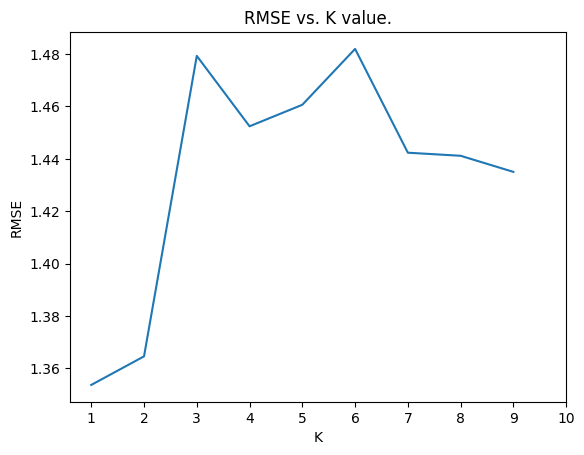

In [619]:
k_list = []
rmse = []
best_RMSE = 3
best_k = 1
for x in range(1,10):
    rs = recommendation_system.recommend_system_package.collab_filtering.CF(rate_train, k = x, uuCF = 1)
    rs.fit()
    n_tests = rate_test.shape[0]
    SE = 0
    for n in range(n_tests):
        pred = rs.pred(rate_test[n, 0], rate_test[n, 1], normalized = 0)
        SE += (pred - rate_test[n, 2])**2 
    RMSE = np.sqrt(SE/n_tests)
    # if (RMSE < best_RMSE): 
    #     best_RMSE = RMSE
    #     best_k = x
    k_list.append(x)
    rmse.append(RMSE)
    print('user-user CF, RMSE = ', RMSE, 'x =', x)
plt.plot(k_list, rmse)
plt.title("RMSE vs. K value.")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()
